<a href="https://colab.research.google.com/github/Hevensh/HvsPredictor/blob/main/predictable_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test the predictability of Hevensh's New Loss Function

In [12]:
!git clone https://github.com/Hevensh/HvsPredictor.git

fatal: destination path 'HvsPredictor' already exists and is not an empty directory.


In [13]:
import numpy as np
import IPython.display
import matplotlib.pyplot as plt
from HvsPredictor import MyPredictor as hvs

In [14]:
t = np.arange(0,5,0.01)
predictable = np.sin(t*np.pi*10)

In [15]:
np.random.seed(0)
noise = np.random.random_sample([500,])

In [30]:
noise_amp = 0.2
x = (1-noise_amp)/10*predictable + noise_amp/10*noise

In [31]:
md1 = hvs.MyPredictor(x)
md1.deTrend()
md1.Options_set()
md1.compile_and_fit()
IPython.display.clear_output()

In [32]:
md2 = hvs.MyPredictor(x)
md2.deTrend()
md2.Options_set(loss_func='mse')
md2.compile_and_fit()
IPython.display.clear_output()

The model uses <HvsPredictor.MyPredictor.CautiousLoss object at 0x7fcfabd6b690>
MSE on test set is 6.015322443632807e-05

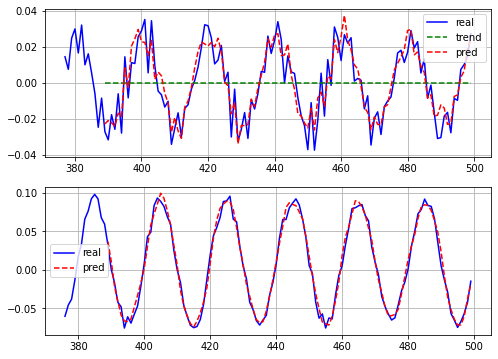

In [33]:
md1.result_plot()
md1

The model uses mse
MSE on test set is 5.996934038875694e-05

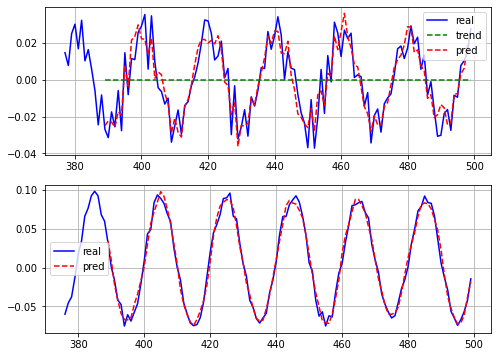

In [34]:
md2.result_plot()
md2

In [35]:
md1.metrics = 'profit'
md1.profit()
md1

The model uses <HvsPredictor.MyPredictor.CautiousLoss object at 0x7fcfabd6b690>
Backtest from date 389
Total profit is : 366.7003%
Daily profit is : 3.3036%
Maximum drawdown is : -0.5333%

In [36]:
md2.metrics = 'profit'
md2.profit()
md2

The model uses mse
Backtest from date 389
Total profit is : 373.9428%
Daily profit is : 3.3689%
Maximum drawdown is : -0.3526%